# 데이터 수집

- 1) 코로나 데이터
    - https://github.com/CSSEGISandData/COVID-19
    - 위 사이트에서 국가별 2020년 2월 데이터부터 2021년 9월까지 데이터 활용

- 2) 백신 접종률 데이터 및 엄격성 지수
    - https://ourworldindata.org/covid-vaccinations

- 3) 2021년 국가별 의료 수준 지수 및 순위 크롤링
    - https://ceoworld.biz/2021/04/27/revealed-countries-with-the-best-health-care-systems-2021/

# 탐색적 데이터 분석 (EDA, Exploratory Data Analysis) 

##  데이터 컬럼별 정보

- FIPS: US only. Federal Information Processing Standards code that uniquely identifies counties within the USA.
- Admin2: County name. US only.
- Province_State: Province, state or dependency name.
- Country_Region: Country, region or sovereignty name. The names of locations included on the Website correspond with the official - - - designations used by the U.S. Department of State.
- Last Update: MM/DD/YYYY HH:mm:ss (24 hour format, in UTC).
- Lat and Long_: Dot locations on the dashboard. All points (except for Australia) shown on the map are based on geographic centroids, and are not representative of a specific address, building or any location at a spatial scale finer than a province/state. Australian dots are located at the centroid of the largest city in each state.
- Confirmed: Counts include confirmed and probable (where reported).
- Deaths: Counts include confirmed and probable (where reported).
- Recovered: Recovered cases are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. US state-level recovered cases are from COVID Tracking Project. We stopped to maintain the recovered cases (see Issue #3464 and Issue #4465).
- Active: Active cases = total cases - total recovered - total deaths. This value is for reference only after we stopped to report the recovered cases (see Issue #4465)
- Incident_Rate: Incidence Rate = cases per 100,000 persons.
- Case_Fatality_Ratio (%): Case-Fatality Ratio (%) = Number recorded deaths / Number cases.
- All cases, deaths, and recoveries reported are based on the date of initial report. Exceptions to this are noted in the "Data Modification" and "Retrospective reporting of (probable) cases and deaths" subsections below.

## 데이터의 전체적인 구조 파악

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np

- 2021년 1월 데이터는 위 column별 설명에 해당하는 모든 컬럼이 존재함.
- 하지만 모든 컬럼을 사용할 필요 없이 데이터 분석에 필요한 컬럼으로 정리 필요
- 컬럼은 'Country', 'Confirmed', 'Deaths', 'Date'로 통일

## 데이터 전처리 

- 2020년 2월 데이터부터 2021년 9월 데이터까지 csv 파일을 데이터 프레임 형태로 변환

- 우리가 살펴볼 국가만 선택해 데이터프레임 만들기
- 한국, 미국, 일본, 프랑스, 이탈리아

In [2]:
import os 
# os.listdir("../data/covid")[2:]

In [3]:
# csv to dataframe
forders = os.listdir("../data/covid")[2:]

In [4]:
from tqdm import tqdm
df_all_date = pd.DataFrame()
for forder in tqdm(forders):
    name = forder.split(".")[0].replace("-", "_")
    df = pd.read_csv("../data/covid/{}".format(forder), sep=",", encoding="utf-8")
    df['date'] = forder.split(".")[0] 
    df_all_date = pd.concat([df_all_date, df])

100%|████████████████████████████████████████████████████████████████████████████████| 608/608 [01:05<00:00,  9.27it/s]


In [8]:
df_all_date.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio', 'date',
       'Province/State', 'Country/Region', 'Last Update', 'Latitude',
       'Longitude', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

- 컬럼을 살펴보면 기간이 바뀌면서 컬럼 이름이 변경된 것들이 있음
- 해당 컬럼을 통일해야 함
    - Country/Region => Country_Region

In [10]:
df_1 = df_all_date[['date', 'Confirmed', 'Deaths', 'Recovered', 'Country/Region', 'Country_Region']]
df_1

,date,Confirmed,Deaths,Recovered,Country/Region,Country_Region
0,01-01-2021,52513,2201.0,41727.0,NaN,Afghanistan
1,01-01-2021,58316,1181.0,33634.0,NaN,Albania
2,01-01-2021,99897,2762.0,67395.0,NaN,Algeria
3,01-01-2021,8117,84.0,7463.0,NaN,Andorra
4,01-01-2021,17568,405.0,11146.0,NaN,Angola
...,...,...,...,...,...,...
3995,12-31-2020,327,1.0,290.0,NaN,Malaysia
3996,12-31-2020,13488,22.0,8246.0,NaN,Malaysia
3997,12-31-2020,1700,8.0,1591.0,NaN,Malaysia
3998,12-31-2020,281,3.0,239.0,NaN,Malaysia


In [11]:
# 결측치 처리
df_1.loc[df_1['Country_Region'].isnull(), 'Country_Region'] = df_1[df_1['Country/Region'].notnull()]['Country/Region']

In [12]:
df_1['Country_Region'].isnull().sum()
df_1.drop('Country/Region', axis=1, inplace=True)

In [13]:
df_2 = df_1[['Country_Region', 'Confirmed', 'Deaths', 'date']].copy()
df_2

,Country_Region,Confirmed,Deaths,date
0,Afghanistan,52513,2201.0,01-01-2021
1,Albania,58316,1181.0,01-01-2021
2,Algeria,99897,2762.0,01-01-2021
3,Andorra,8117,84.0,01-01-2021
4,Angola,17568,405.0,01-01-2021
...,...,...,...,...
3995,Malaysia,327,1.0,12-31-2020
3996,Malaysia,13488,22.0,12-31-2020
3997,Malaysia,1700,8.0,12-31-2020
3998,Malaysia,281,3.0,12-31-2020


In [689]:
df_2['Country_Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

- 한국, 미국, 일본, 프랑스, 이탈리아
- Korea, South / Republic of Korea => South Korea
    - 한국은 이름이 세 가지 방식으로 표기 돼있어서 통일 시켜줘야 함 
- US
- Japan
- France
- Italy

In [14]:
df_2.loc[(df_2['Country_Region'] == 'Korea, South') | (df_2['Country_Region'] == 'Republic of Korea'), 'Country_Region'] = 'South Korea'

In [15]:
# 한국, 미국, 일본, 프랑스, 이탈리아만 추출
df_3 = df_2[(df_2['Country_Region'] == 'South Korea') | (df_2['Country_Region'] == 'US') | (df_2['Country_Region'] == 'Japan')\
             | (df_2['Country_Region'] == 'France') | (df_2['Country_Region'] == 'Italy')]

df_3.reset_index(drop=True, inplace=True)
df_3

,Country_Region,Confirmed,Deaths,date
0,France,13166,71.0,01-01-2021
1,France,16926,114.0,01-01-2021
2,France,8620,155.0,01-01-2021
3,France,6091,43.0,01-01-2021
4,France,5890,55.0,01-01-2021
...,...,...,...,...
1834507,US,0,0.0,12-31-2020
1834508,US,781,19.0,12-31-2020
1834509,US,476,2.0,12-31-2020
1834510,US,152,0.0,12-31-2020


- date가 MM-DD-YYYY 형식으로 표기 돼있기 때문에 좀더 보기 편하게 YYYY-MM-DD 형태로 바꿔주기

In [17]:
df_3['date'] = pd.to_datetime(df_3['date'],format='%m-%d-%Y')

In [18]:
df_3.rename(columns = {'Country_Region':'Country'}, inplace=True)

In [19]:
df = df_3.sort_values('date').copy()

In [20]:
df.rename(columns = {'Country':'국가', 'Confirmed':'확진자수', 'Deaths':'사망자수', 'Latitude':'위도', 'Longitude':'경도', 'date':'날짜'}, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,국가,확진자수,사망자수,날짜
0,Japan,20,0.0,2020-02-01
1,France,6,0.0,2020-02-01
2,Italy,2,0.0,2020-02-01
3,US,2,0.0,2020-02-01
4,US,1,0.0,2020-02-01
...,...,...,...,...
1834507,US,4264,51.0,2021-09-30
1834508,US,2474,47.0,2021-09-30
1834509,US,9688,118.0,2021-09-30
1834510,US,27124,353.0,2021-09-30


# 데이터 시각화

- 국가별 코로나 확진자수, 사망자수 시각화
- 국가별 전체 코로나 확진자수 및 사망자수 확인하기 위해 같은 날짜는 확진자수 합쳐줌
- 한국, 미국, 일본, 프랑스, 이탈리아

In [22]:
import seaborn as sns
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import set_matplotlib_hangul

Hangul OK in your Windows!!!


In [25]:
# 국가별 데이터 프레임 만들기
def make_country_df(name):
    globals()['{}'.format(name)] = pd.DataFrame(columns = ['국가', '일일 확진자수', '일일 사망자수', '누적 확진자수', '누적 사망자수', '날짜'])
    country = globals()['{}'.format(name)]
    temp1 = df[df['국가'] == name].copy()
    temp1.reset_index(drop=True, inplace=True)
    temp = temp1.pivot_table(index=["날짜"], values=["확진자수", '사망자수'], aggfunc=np.sum)
    country['누적 사망자수'] = temp['사망자수']
    country['누적 확진자수'] = temp['확진자수']
    country['날짜'] = temp.index
    country['국가'] = name
    country.reset_index(drop=True, inplace=True)
    country['일일 확진자수'][0] = country['누적 확진자수'][0]
    country['일일 사망자수'][0] = country['누적 사망자수'][0]
    for i in range(1, len(country)):
        country['일일 확진자수'][i] = country['누적 확진자수'][i] - country['누적 확진자수'][i-1]
        country['일일 사망자수'][i] = country['누적 사망자수'][i] - country['누적 사망자수'][i-1]
    return country

In [26]:
Korea = make_country_df('South Korea')
US = make_country_df('US')
Japan = make_country_df('Japan')
France = make_country_df('France')
Italy = make_country_df('Italy')

In [95]:
# 일일/누적 확진자수, 사망자수 그래프 그리는 함수
def drawGraph(country):
    plt.figure(figsize=(12, 12))
    plt.subplot(2, 1, 1)
    plt.plot(country['날짜'], country['일일 확진자수'], label="확진자수")
    plt.plot(country['날짜'], country['일일 사망자수'], label='사망자수')
    plt.title('{} 일일 확진자수, 사망자수 시각화'.format(country['국가'][0]), fontsize=20)
    plt.grid()
    plt.ylabel('수', fontsize=14)
    plt.xlabel('날짜', fontsize=14)
    plt.legend(fontsize=12, loc='best')

    plt.subplot(2, 1, 2)  
    plt.plot(country['날짜'], country['누적 확진자수'], label="확진자수")
    plt.plot(country['날짜'], country['누적 사망자수'], label='사망자수')
    plt.title('{} 누적 확진자수, 사망자수 시각화'.format(country['국가'][0]), fontsize=20)
    plt.grid()
    plt.ylabel('수', fontsize=14)
    plt.xlabel('날짜', fontsize=14)
    plt.legend(fontsize=12, loc='best')
    plt.show()

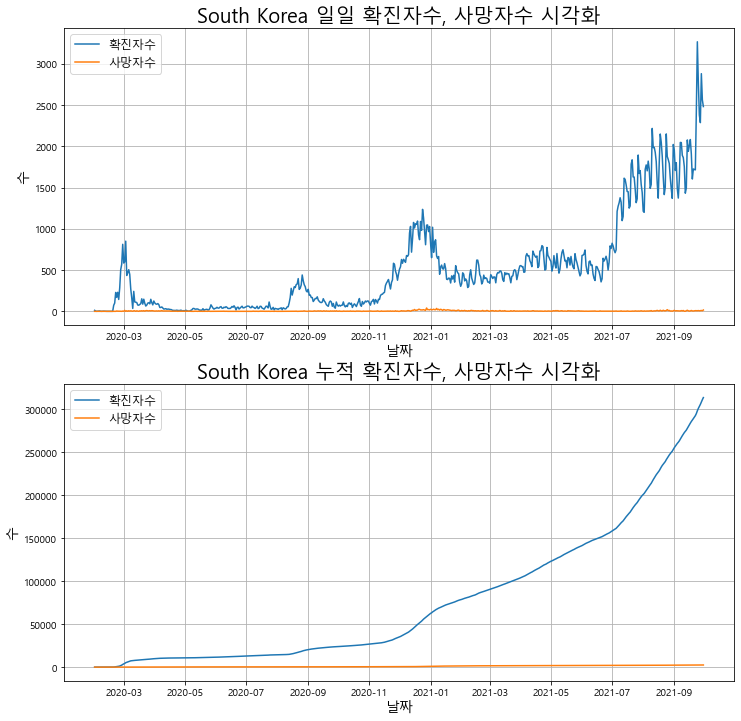

In [96]:
# 대한민국
drawGraph(Korea)

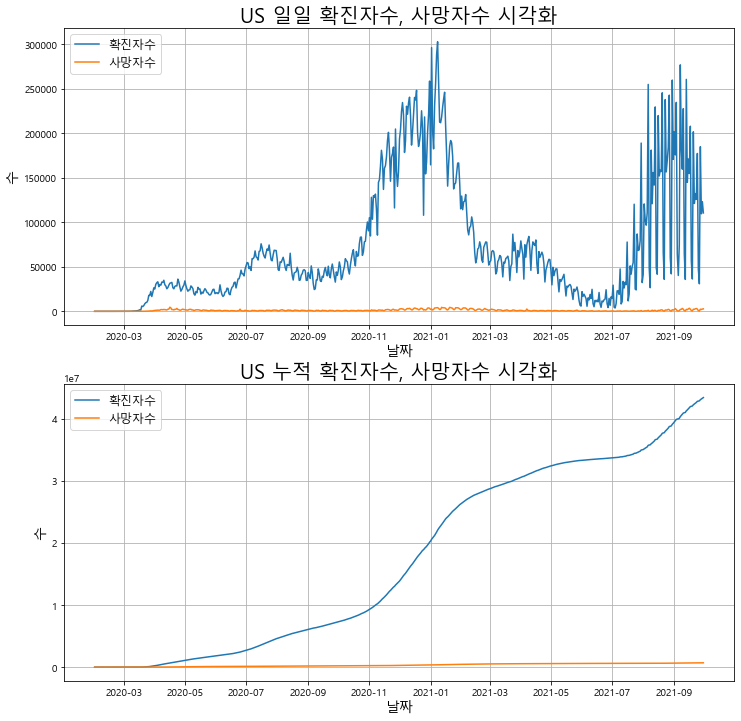

In [31]:
# 미국
drawGraph(US)

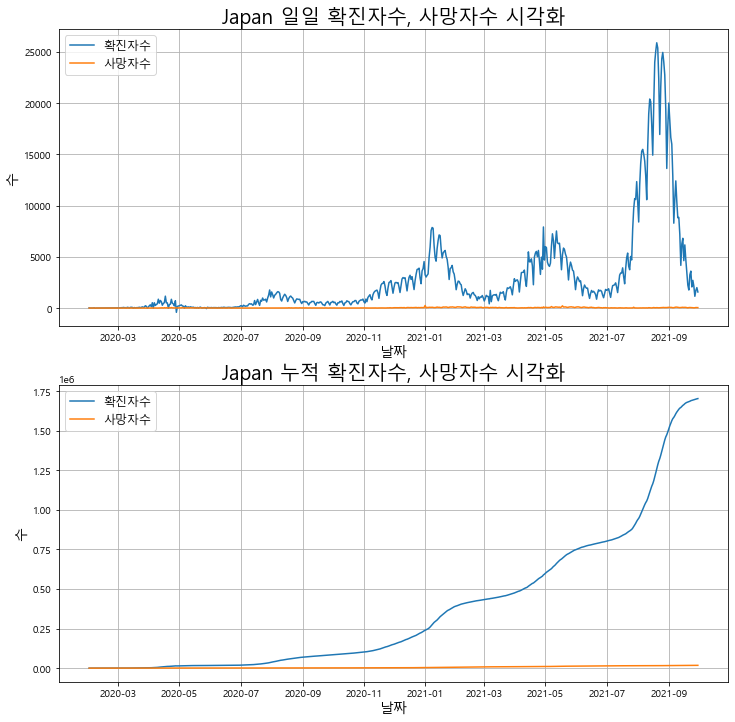

In [32]:
# 일본
drawGraph(Japan)

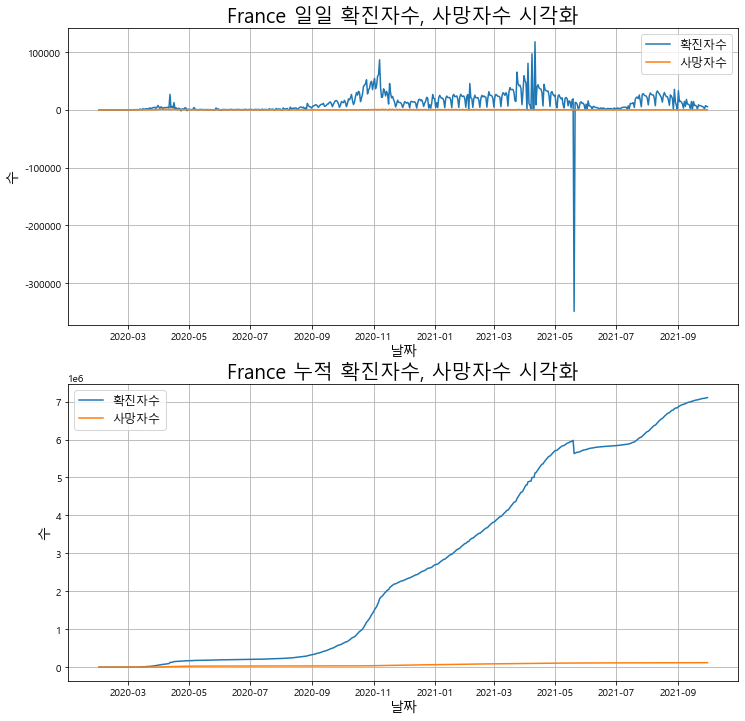

In [34]:
# 프랑스
drawGraph(France)

- 프랑스 일일 확진자 수 시각화 결과를 보면 확진자수가 음수인 경우가 있음
- 확진자 수가 음수일 수는 없기 때문에 음수인 수는 해당 일의 전날 데이터로 대체

In [35]:
France[France['일일 확진자수'] < 0]

,국가,일일 확진자수,일일 사망자수,누적 확진자수,누적 사망자수,날짜
82,France,-1697,516.0,158315,21860.0,2020-04-23
88,France,-1455,426.0,167643,24091.0,2020-04-29
122,France,-779,106.0,190603,28943.0,2020-06-02
474,France,-348840,133.0,5629921,108477.0,2021-05-20


In [37]:
France.loc[France['일일 확진자수'] < 0, '일일 확진자수'] = None

In [39]:
France.fillna(method='ffill', inplace=True)

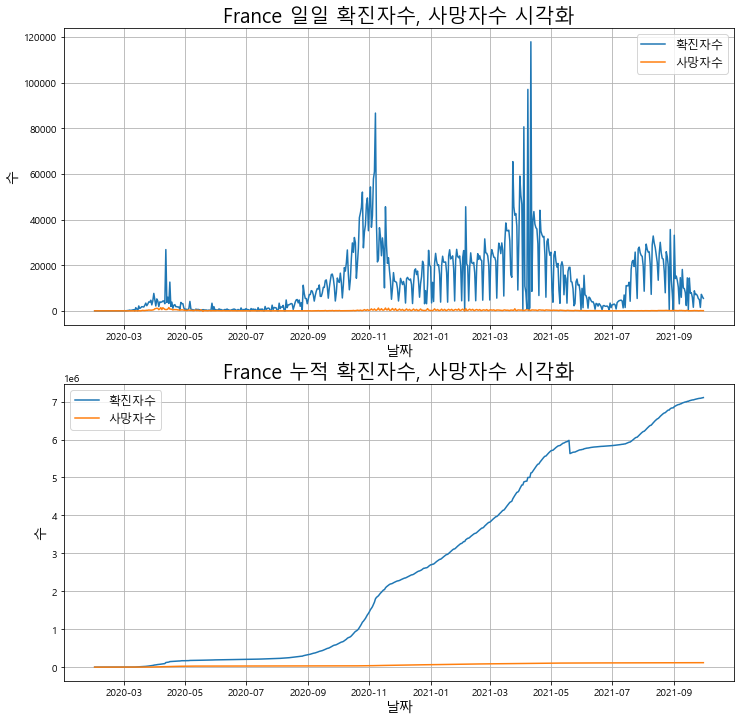

In [42]:
drawGraph(France)

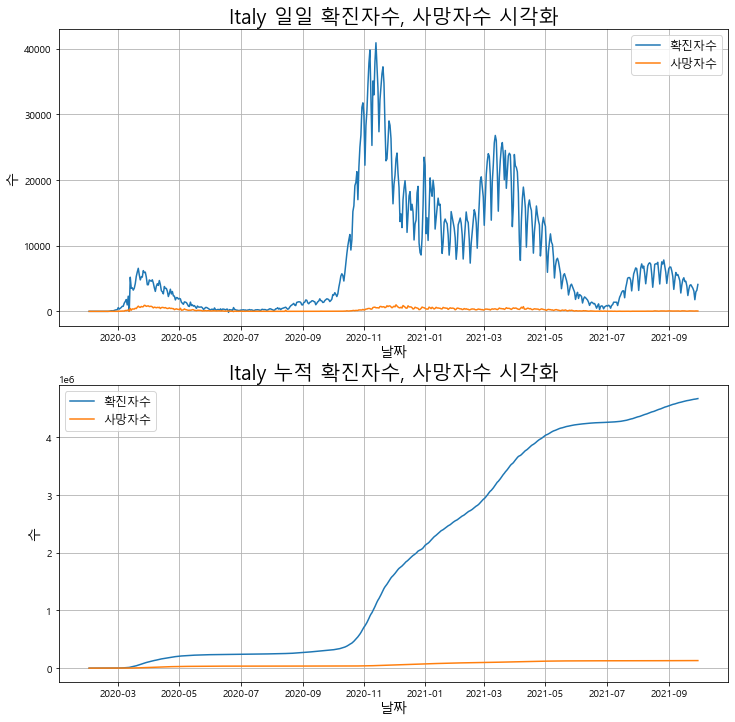

In [43]:
# 이탈리아
drawGraph(Italy)

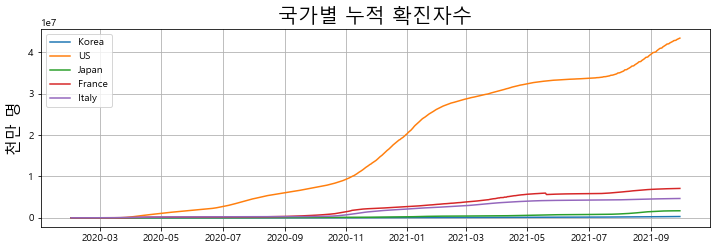

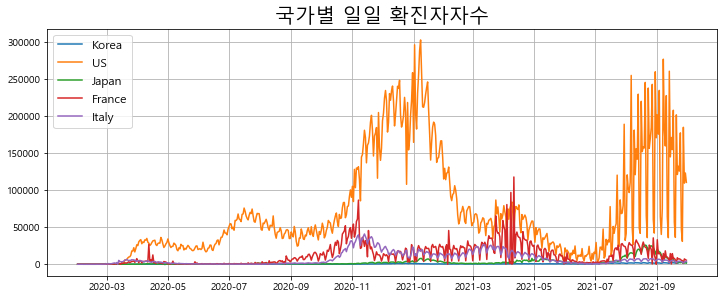

In [92]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 2)
plt.plot(Korea['날짜'], Korea['일일 확진자수'], label="Korea")
plt.plot(US['날짜'], US['일일 확진자수'], label='US')
plt.plot(Japan['날짜'], Japan['일일 확진자수'], label='Japan')
plt.plot(France['날짜'], France['일일 확진자수'], label='France')
plt.plot(Italy['날짜'], Italy['일일 확진자수'], label='Italy')
plt.title('국가별 일일 확진자자수', fontsize=20)
plt.grid(True)
plt.legend(fontsize=12, loc='best')
plt.show()

- 미국은 다른 국가에 비해 누적 확진자수가 3배 이상 많은 것으로 나타났음.
- 누적 확진자수가 많은 비율은 미국, 프랑스, 이탈리아, 일본, 한국 순으로 나타났음.
- 대부분의 국가가 변동폭이 크게 나타난 반면, 한국은 계속해서 증가하는 추세를 보이고 있음

# 인구별 데이터 시각화

In [100]:
### 대한민국 인구수: 51,317,649
### 미국 인구수: 334,483,145
### 일본 인구수:  126,401,064
### 프랑스 인구수: 65,426,177
### 이탈리아 인구수: 60,367,471

In [101]:
# 인구수 대비 코로나 누적 확진자 비율

In [102]:
Korea['인구수'] = 51317649
Korea['확진자 비율 (%)'] = Korea['누적 확진자수'] / Korea['인구수'] * 100
Korea['사망자 비율 (%)'] = Korea['누적 사망자수'] / Korea['인구수'] * 100

US['인구수'] = 334483145
US['확진자 비율 (%)'] = US['누적 확진자수'] / US['인구수'] * 100
US['사망자 비율 (%)'] = US['누적 사망자수'] / US['인구수'] * 100

Japan['인구수'] = 126401064
Japan['확진자 비율 (%)'] = Japan['누적 확진자수'] / Japan['인구수'] * 100
Japan['사망자 비율 (%)'] = Japan['누적 사망자수'] / Japan['인구수'] * 100

France['인구수'] = 65426177
France['확진자 비율 (%)'] = France['누적 확진자수'] / France['인구수'] * 100
France['사망자 비율 (%)'] = France['누적 사망자수'] / France['인구수'] * 100

Italy['인구수'] = 60367471
Italy['확진자 비율 (%)'] = Italy['누적 확진자수'] / Italy['인구수'] * 100
Italy['사망자 비율 (%)'] = Italy['누적 사망자수'] / Italy['인구수'] * 100

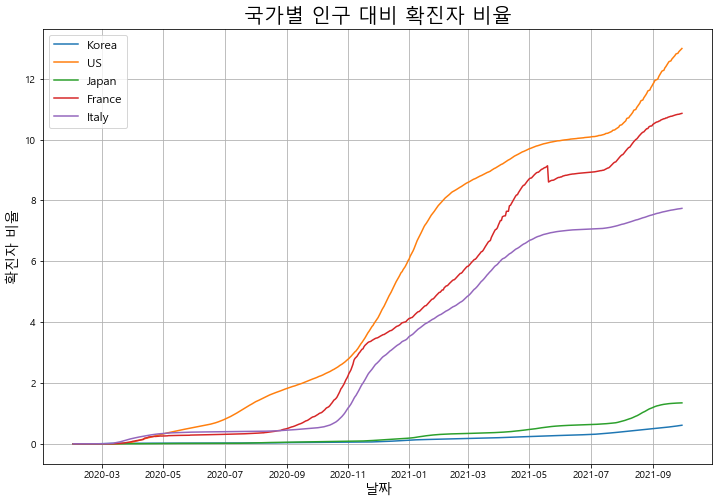

In [186]:
plt.figure(figsize=(12, 8))
plt.plot(Korea['날짜'], Korea['확진자 비율 (%)'], label="Korea")
plt.plot(US['날짜'], US['확진자 비율 (%)'], label='US')
plt.plot(Japan['날짜'], Japan['확진자 비율 (%)'], label='Japan')
plt.plot(France['날짜'], France['확진자 비율 (%)'], label='France')
plt.plot(Italy['날짜'], Italy['확진자 비율 (%)'], label='Italy')
plt.title('국가별 인구 대비 확진자 비율', fontsize=20)
plt.grid(True)
plt.ylabel('확진자 비율', fontsize=14)
plt.xlabel('날짜', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

- 국가별 총 인구 대비 확진자 비율을 시각화한 결과
- 미국의 경우 2021년 7월을 기점으로 9월 총 인구 대비 확진자 비율이 12%를 돌파했음.
- 프랑스 역시 가파르게 증가해 같은 달에 10%를 돌파했음.
- 이탈리아는 미국, 프랑스와 함께 증가 추세를 보이다가 2021년 5월 이후 두 국가에 비해 크게 증가하지 않았음
- 이외에 한국과 일본은 인구 대비 확진자 비율이 2%도 되지 않는 것으로 나타남

# 시계열 분석을 통한 전체 트렌드 및 주기별 특성 파악

In [107]:
import plotly.graph_objs as go
import plotly.offline as py
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

## 국가별 시계열 데이터 분석

In [127]:
# fbprophet을 이용한 시계열 데이터 분석 함수
def time_series(country):
    prophet = pd.DataFrame({"ds": country['날짜'], "y": country["일일 확진자수"]})
    m = Prophet(yearly_seasonality=True, daily_seasonality=True, weekly_seasonality=True, seasonality_mode='additive')
    m.fit(prophet);
    
    # 60일에 해당하는 데이터 예측
    future = m.make_future_dataframe(periods=60)
    forecast = m.predict(future)
    
    # 그래프에 chagepoint 추가
    fig = m.plot(forecast)
    a = add_changepoints_to_plot(fig.gca(), m, forecast); 
#     m.plot_components(forecast);

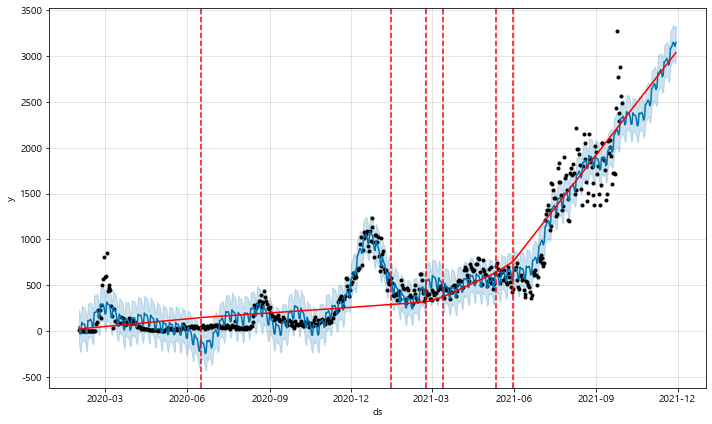

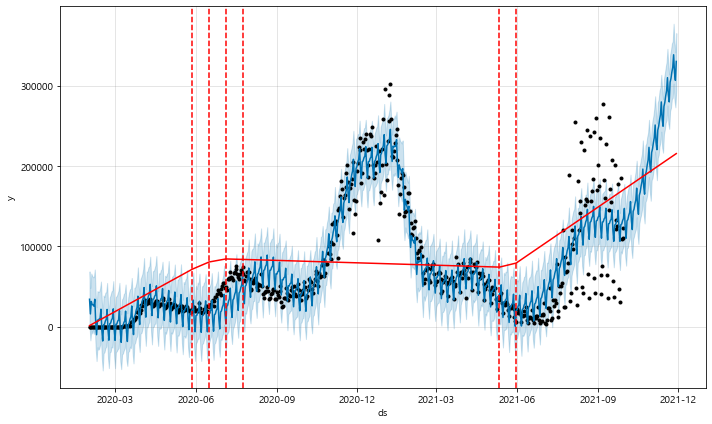

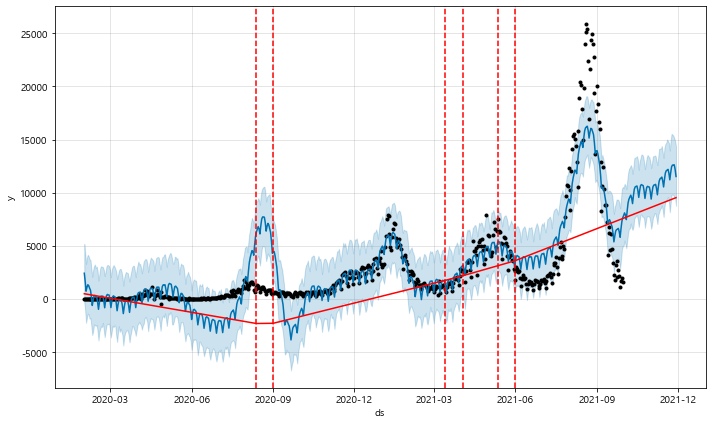

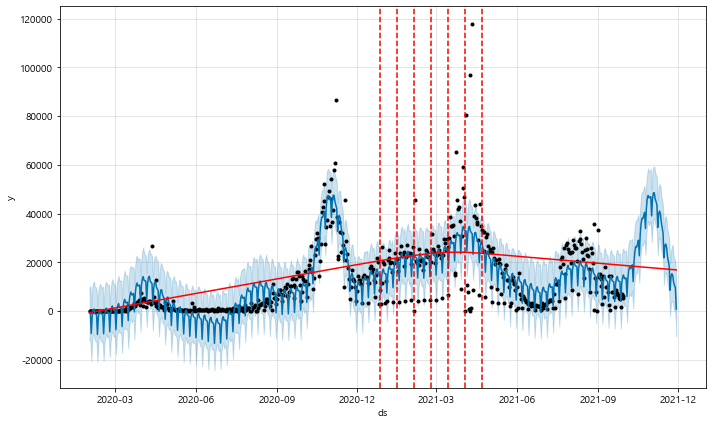

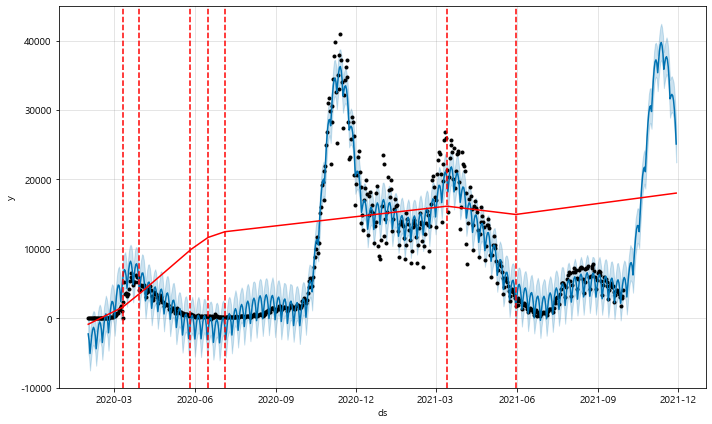

In [128]:
# 한국, 미국, 일본, 프랑스, 이탈리아
time_series(Korea)
time_series(US)
time_series(Japan)
time_series(France)
time_series(Italy)

In [141]:
# fbprophet을 이용한 시계열 데이터 분석 함수
def time_series_components(country):
    prophet = pd.DataFrame({"ds": country['날짜'], "y": country["일일 확진자수"]})
    m = Prophet(yearly_seasonality=True, daily_seasonality=True, weekly_seasonality=True, seasonality_mode='additive')
    m.fit(prophet);
    
    # 60일에 해당하는 데이터 예측
    future = m.make_future_dataframe(periods=60)
    forecast = m.predict(future)
 
    m.plot_components(forecast);

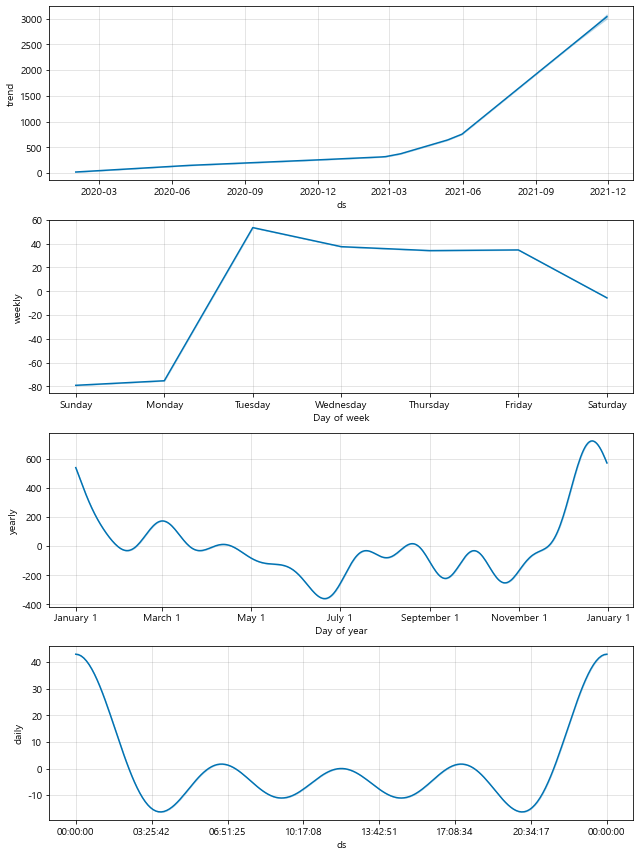

In [136]:
time_series_components(Korea)

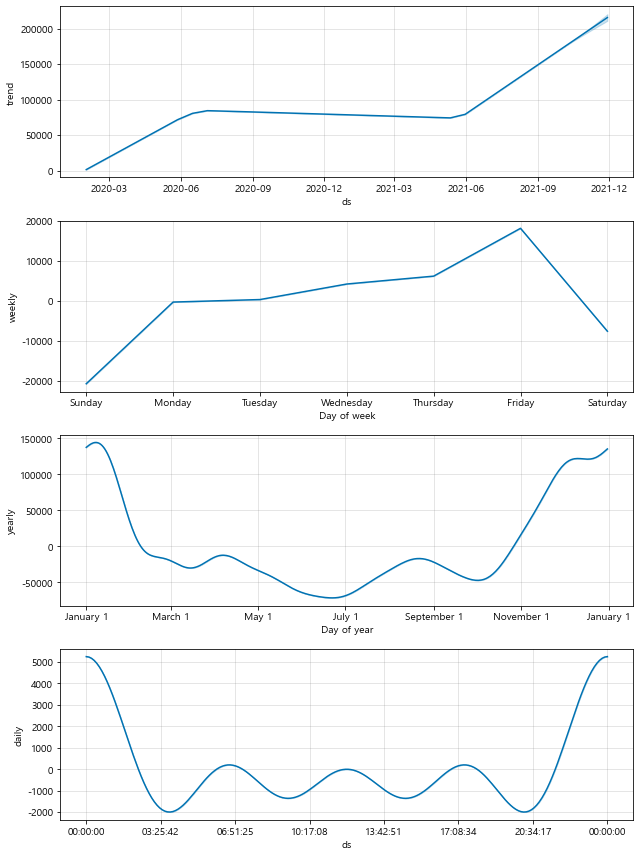

In [137]:
time_series_components(US)

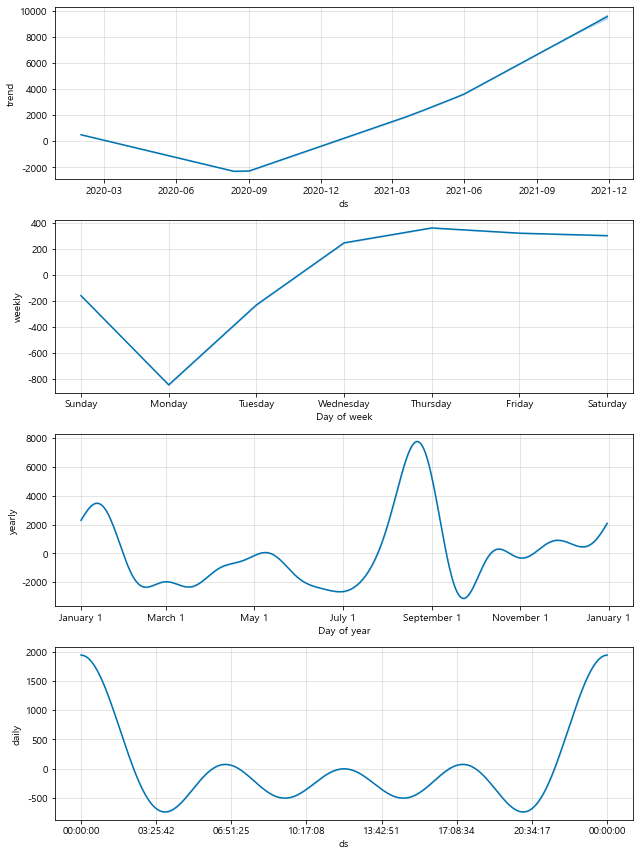

In [138]:
time_series_components(Japan)

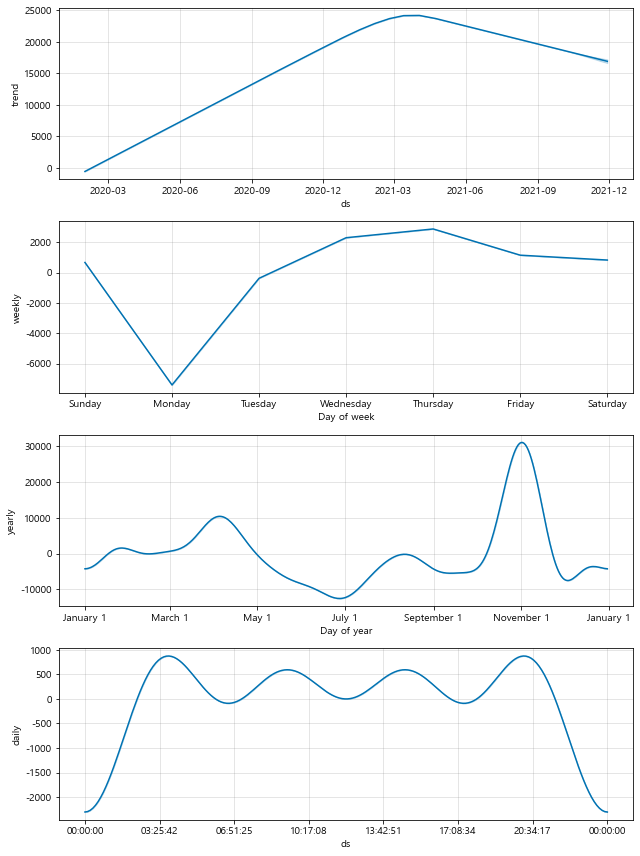

In [139]:
time_series_components(France)

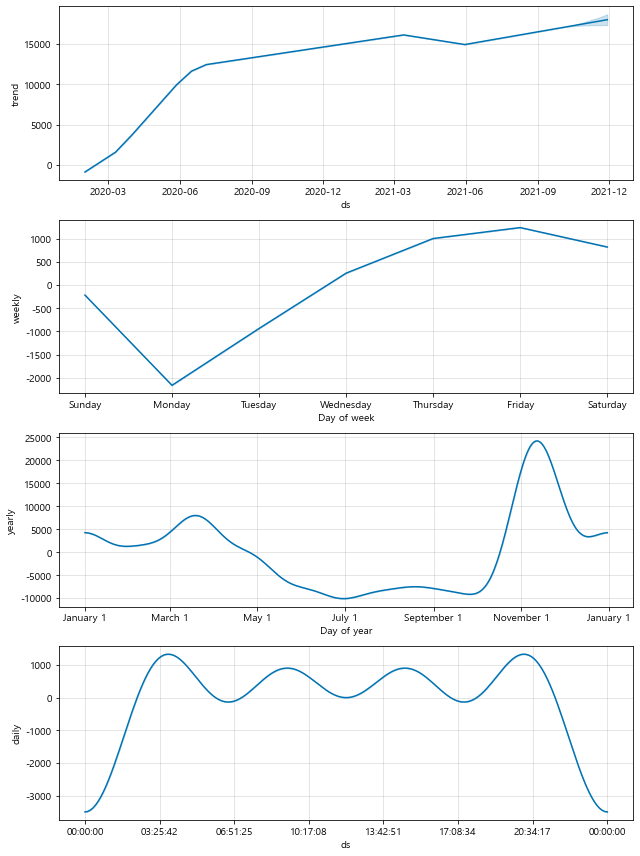

In [140]:
time_series_components(Italy)

- 5개 국가의 시계열 데이터를 fbprophet을 이용해 시각화한 결과
- 공통점: 5개 국가 모두 연말 또는 연초(12월, 1월)에 확진자가 폭등했음
- 한국과 미국은 굉장히 비슷한 양상을 띔(추세선 역시 급격하게 증가하는 것으로 예측됨)
- 특히, 한국은 2021년 6월부터 확진자수가 급격하게 늘어나고 있으며 앞으로도 계속해서 늘어날 것으로 예측됨
- 일본의 경우, 도쿄 올림픽 이후인 9월 확진자가 폭등한 것으로 보임
- 프랑스와 이탈리아 두 국가 모두 2021년 4월 이후 감소하는 추세로 보이나 예측 결과 이후 다시 크게 상승했다가 줄어들 거나 약간 증가할 것으로 예상됨

# 우리나라는 코로나 바이러스에 잘 대응하고 있을까?

- 백신 접종률 데이터, 엄격성 지수(https://ourworldindata.org/covid-vaccinations)

- 올해 9월 말까지 대한민국을 제외한 나머지 4개국 모두 확진자 수가 감소했음
- 반면, 대한민국의 경우 다른 국가들과 달리 확진자수가 계속해서 증가하는 경향을 띄고 있음, 증가율 역시 굉장히 높음
- 우리나라의 코로나 대응에 대해 평가해보고자 함
    - 1) <b>백신 접종 데이터</b>를 통해 타국가와 백신 접종기간 및 인구대비 접종률 진행 현황을 분석할 예정
    - 2) 국가별 정책을 반영하기 위한 <b>엄격성 지수</b>(학교·직장 폐쇄, 공공행사 취소, 여행 금지 등 이동 및 경제활동 제약을 나타내는 지수)를 활용할 예정

## 백신 접종 데이터

In [142]:
vaccine = pd.read_csv("../data/vaccine.csv", sep=",", encoding="utf-8")
vaccine.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [143]:
# 필요한 국가 데이터만 살펴보기
# South Korea, United States, Japan, France, Italy

vaccine = vaccine[(vaccine['location'] == 'South Korea') | (vaccine['location'] == 'United States') | (vaccine['location'] == 'Japan')\
                  | (vaccine['location'] == 'France') | (vaccine['location'] == 'Italy')]

In [146]:
# 불필요한 컬럼 제거 및 필요한 컬럼만 추출
# location, date, people_fully_vaccinated, population
vaccine_5 = vaccine[['location', 'date', 'people_fully_vaccinated', 'population']]
vaccine_5.reset_index(drop=True, inplace=True)

In [148]:
# 불필요한 2020년 1월과 2021년 10월 데이터 제거
remove_index = vaccine_5[vaccine_5['date'].str.contains('2020-01-') | vaccine_5['date'].str.contains('2021-10-')].index
vaccine_5.drop(index = remove_index, axis=0, inplace=True)

In [149]:
vaccine_5.isnull().sum()

location                      0
date                          0
people_fully_vaccinated    1871
population                    0
dtype: int64

In [150]:
# 결측치 처리
vaccine_5.fillna(0, inplace=True)

In [152]:
# column rename
vaccine_5.rename(columns={'location':'국가',
                          'date':'날짜',
                          'people_fully_vaccinated': '누적 접종 완료자',
                          'population': '인구수'
                         }, inplace=True)

vaccine_5 = vaccine_5[['국가', '누적 접종 완료자', '인구수', '날짜']]
vaccine_5.reset_index(drop=True, inplace=True)
vaccine_5.head()

,국가,누적 접종 완료자,인구수,날짜
0,France,0.0,67564251.0,2020-02-01
1,France,0.0,67564251.0,2020-02-02
2,France,0.0,67564251.0,2020-02-03
3,France,0.0,67564251.0,2020-02-04
4,France,0.0,67564251.0,2020-02-05


In [153]:
# 인구대비 1, 2차 접종률 컬럼 추가
vaccine_5['접종률 (%)'] = (vaccine_5['누적 접종 완료자'] / vaccine_5['인구수']) * 100

In [154]:
vaccine_5

,국가,누적 접종 완료자,인구수,날짜,접종률 (%)
0,France,0.0,67564251.0,2020-02-01,0.000000
1,France,0.0,67564251.0,2020-02-02,0.000000
2,France,0.0,67564251.0,2020-02-03,0.000000
3,France,0.0,67564251.0,2020-02-04,0.000000
4,France,0.0,67564251.0,2020-02-05,0.000000
...,...,...,...,...,...
3035,United States,183670870.0,332915074.0,2021-09-26,55.170488
3036,United States,183888907.0,332915074.0,2021-09-27,55.235981
3037,United States,0.0,332915074.0,2021-09-28,0.000000
3038,United States,184335263.0,332915074.0,2021-09-29,55.370056


In [155]:
vaccine_5['날짜'] = pd.to_datetime(vaccine_5['날짜'], format="%Y-%m-%d")

In [158]:
# 한국 백신 접종자 데이터 
vaccine_kor = vaccine_5[vaccine_5['국가'] == 'South Korea']
vaccine_kor.reset_index(drop=True, inplace=True)

# 미국 백신 접종자 데이터 
vaccine_us = vaccine_5[vaccine_5['국가'] == 'United States']
vaccine_us.reset_index(drop=True, inplace=True)

# 일본 백신 접종자 데이터 
vaccine_jpn = vaccine_5[vaccine_5['국가'] == 'Japan']
vaccine_jpn.reset_index(drop=True, inplace=True)

# 프랑스 백신 접종자 데이터 
vaccine_fr = vaccine_5[vaccine_5['국가'] == 'France']
vaccine_fr.reset_index(drop=True, inplace=True)

# 이탈리아 백신 접종자 데이터 
vaccine_It = vaccine_5[vaccine_5['국가'] == 'Italy']
vaccine_It.reset_index(drop=True, inplace=True)

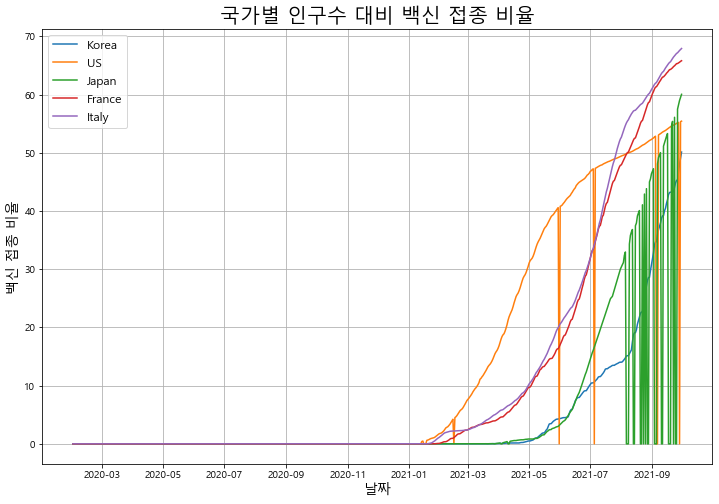

In [159]:
plt.figure(figsize=(12, 8))
plt.plot(vaccine_kor['날짜'], vaccine_kor['접종률 (%)'], label="Korea")
plt.plot(vaccine_us['날짜'], vaccine_us['접종률 (%)'], label='US')
plt.plot(vaccine_jpn['날짜'], vaccine_jpn['접종률 (%)'], label='Japan')
plt.plot(vaccine_fr['날짜'], vaccine_fr['접종률 (%)'], label='France')
plt.plot(vaccine_It['날짜'], vaccine_It['접종률 (%)'], label='Italy')
plt.title('국가별 인구수 대비 백신 접종 비율', fontsize=20)
plt.grid(True)
plt.ylabel('백신 접종 비율', fontsize=14)
plt.xlabel('날짜', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

- 결측치를 모두 0으로 처리해줘서 미국과 일본의 그래프가 약간 이상하게 그려짐
- 증가하는 추세이므로 갑자기 0으로 떨어진 값 가지고 있는 행 제거

In [160]:
# 미국은 2021년 1월 이후
remove_index = vaccine_us[(vaccine_us['날짜'] > '2021-01-01') & (vaccine_us['누적 접종 완료자'] == 0)].index
vaccine_us.drop(index=remove_index, axis=0, inplace=True)

# 일본은 2021년 7월 이후
remove_index = vaccine_jpn[(vaccine_jpn['날짜'] > '2021-07-01') & (vaccine_jpn['누적 접종 완료자'] == 0)].index
vaccine_jpn.drop(index=remove_index, axis=0, inplace=True)

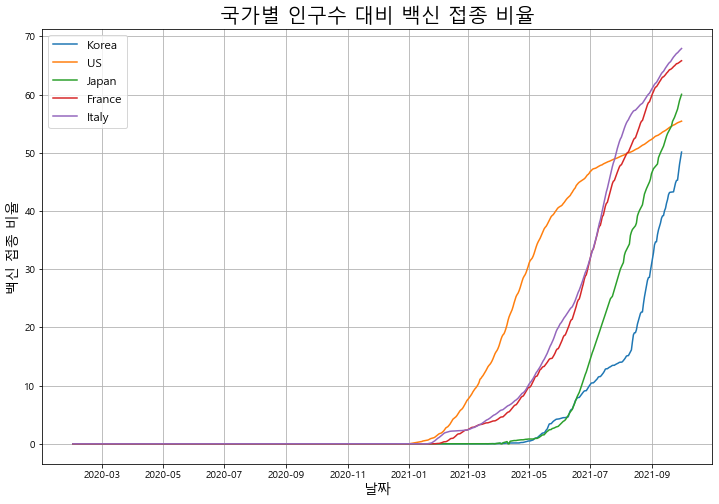

In [161]:
plt.figure(figsize=(12, 8))
plt.plot(vaccine_kor['날짜'], vaccine_kor['접종률 (%)'], label="Korea")
plt.plot(vaccine_us['날짜'], vaccine_us['접종률 (%)'], label='US')
plt.plot(vaccine_jpn['날짜'], vaccine_jpn['접종률 (%)'], label='Japan')
plt.plot(vaccine_fr['날짜'], vaccine_fr['접종률 (%)'], label='France')
plt.plot(vaccine_It['날짜'], vaccine_It['접종률 (%)'], label='Italy')
plt.title('국가별 인구수 대비 백신 접종 비율', fontsize=20)
plt.grid(True)
plt.ylabel('백신 접종 비율', fontsize=14)
plt.xlabel('날짜', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

- 이상치 처리 후 그래프 다시 그린 결과
- 미국의 경우 접종을 완료한 인구가 다른 나라보다 더 빠르게 존재, 이후 타국가 상승대비 상승폭이 감소했음
- 이탈리아와 프랑스가 인구대비 접종완료율이 비슷함(약 70%정도)
- 한국과 일본도 인구대비 접종완료율이 비슷했으나 7월 이후 한국의 접종율이 좀 더 더뎌지면서 10% 정도 차이남
- 아마도 일본은 올림픽 이전과 올림픽 시기에 접종 완료율을 높인듯함
- 한국의 일일 코로나 확진자수가 빠르게 증가하는 이유 중 하나로 인구대비 접종율이 약 50% 정도로 가장 낮기 때문인 것으로 추측됨   
- 타 국가에 비해 접종율이 10~20% 가량 낮은 한국은 접종 완료한 인구비율이 높아지지 않는 이상 시계열 데이터 예측 결과대로 확진자 증가할 것으로 예상됨

## 엄격성 지수
- 학교·직장 폐쇄, 공공행사 취소, 여행 금지 등 이동 및 경제활동 제약을 나타내는 지수

In [162]:
# 불필요한 컬럼 제거 및 필요한 컬럼만 추출
new_df = vaccine[['location', 'stringency_index', 'date']]
new_df.reset_index(drop=True, inplace=True)
new_df['date'] = pd.to_datetime(new_df['date'], format="%Y-%m-%d")

In [163]:
kor_df = new_df[new_df['location'] == 'South Korea']
us_df = new_df[new_df['location'] == 'United States']
jpn_df = new_df[new_df['location'] == 'Japan']
fr_df = new_df[new_df['location'] == 'France']
it_df = new_df[new_df['location'] == 'Italy']

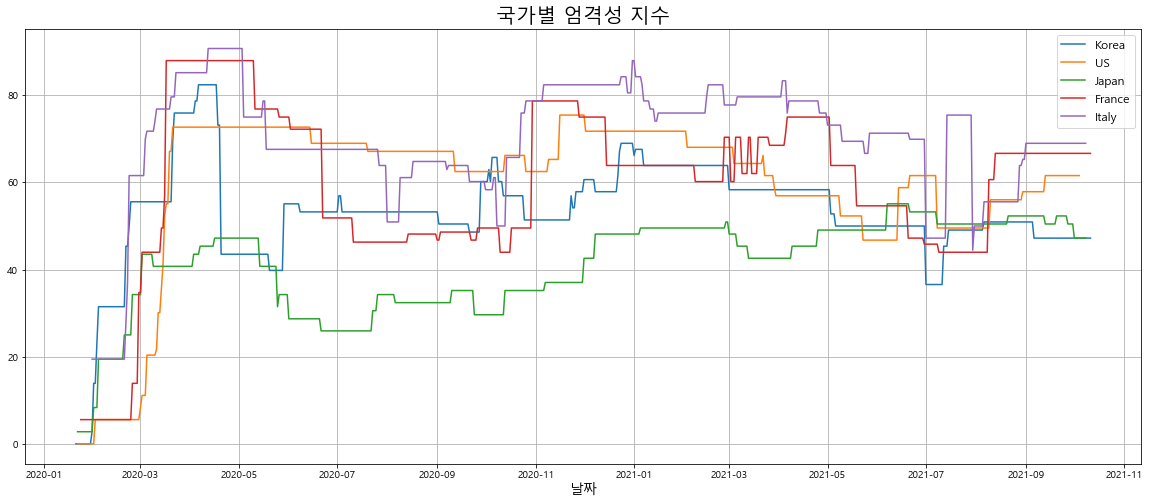

In [164]:
plt.figure(figsize=(20, 8))
plt.plot(kor_df['date'], kor_df['stringency_index'], label='Korea')
plt.plot(us_df['date'], us_df['stringency_index'], label='US')
plt.plot(jpn_df['date'], jpn_df['stringency_index'], label='Japan')
plt.plot(fr_df['date'], fr_df['stringency_index'], label='France')
plt.plot(it_df['date'], it_df['stringency_index'], label='Italy')
plt.title('국가별 엄격성 지수', fontsize=20)
plt.grid(True)
plt.xlabel('날짜', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

In [165]:
temp = new_df.pivot_table(index=['location'], values = ['stringency_index'], aggfunc=np.mean).sort_values('stringency_index', ascending=False)
temp

,stringency_index
location,
Italy,69.885592
France,59.478293
United States,59.433135
South Korea,53.033873
Japan,41.142141


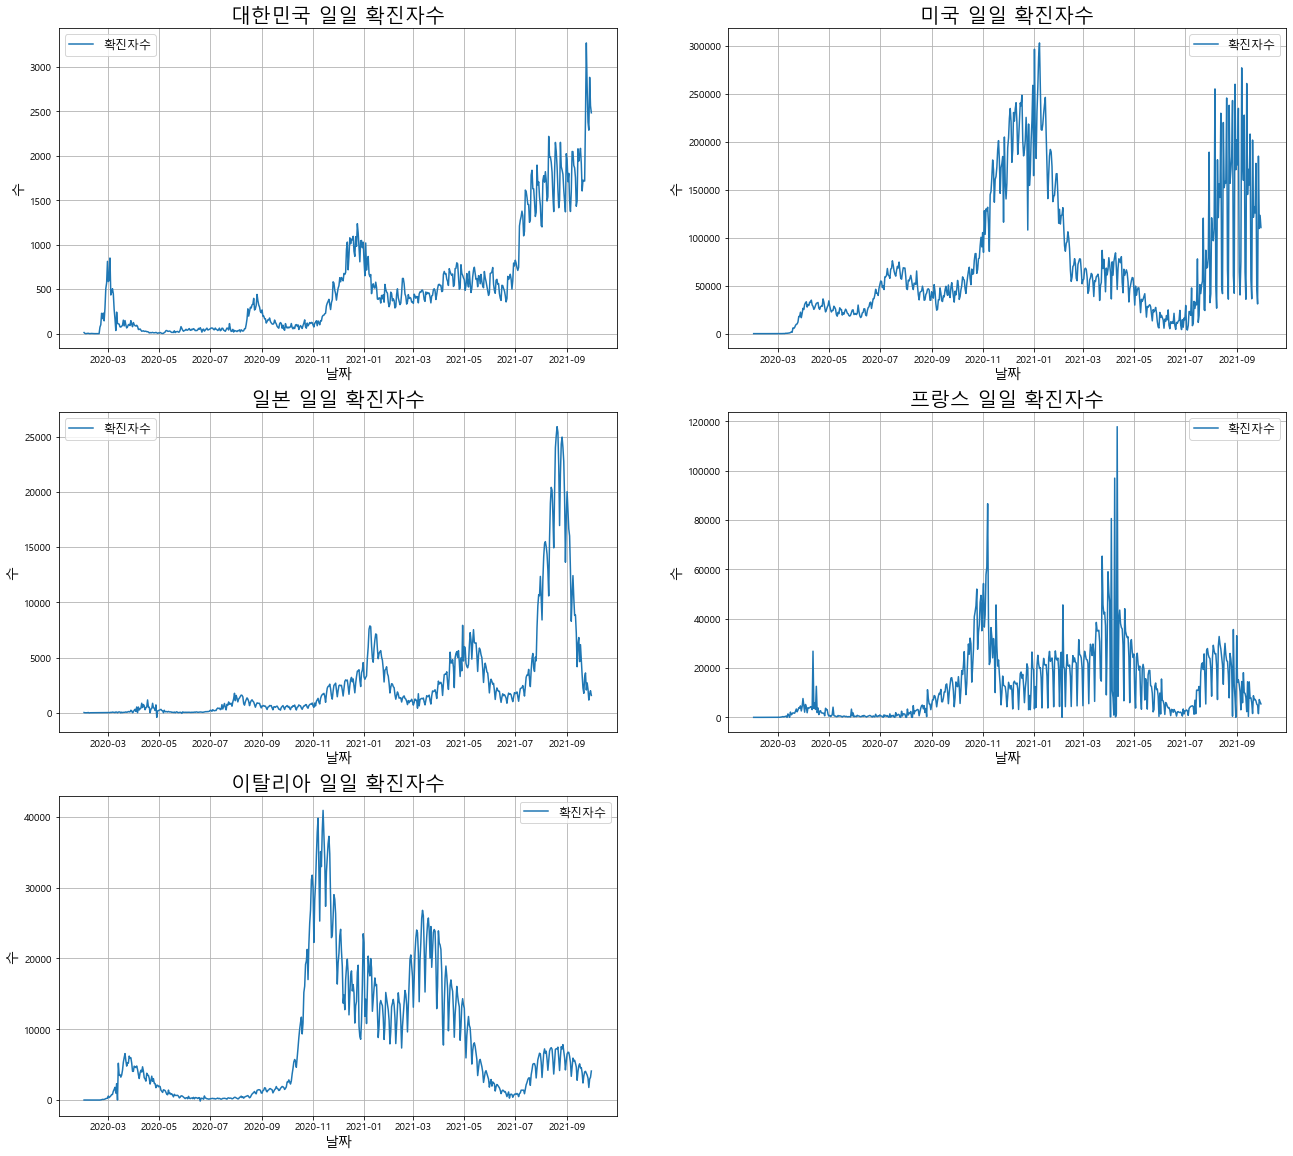

In [167]:
plt.figure(figsize=(22, 20))
plt.subplot(3, 2, 1)
plt.plot(Korea['날짜'], Korea['일일 확진자수'], label="확진자수")
plt.title('대한민국 일일 확진자수', fontsize=20)
plt.grid()
plt.ylabel('수', fontsize=14)
plt.xlabel('날짜', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.subplot(3, 2, 2)  
plt.plot(US['날짜'], US['일일 확진자수'], label="확진자수")
plt.title('미국 일일 확진자수', fontsize=20)
plt.grid()
plt.ylabel('수', fontsize=14)
plt.xlabel('날짜', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.subplot(3, 2, 3)  
plt.plot(Japan['날짜'], Japan['일일 확진자수'], label="확진자수")
plt.title('일본 일일 확진자수', fontsize=20)
plt.grid()
plt.ylabel('수', fontsize=14)
plt.xlabel('날짜', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.subplot(3, 2, 4)  
plt.plot(France['날짜'], France['일일 확진자수'], label="확진자수")
plt.title('프랑스 일일 확진자수', fontsize=20)
plt.grid()
plt.ylabel('수', fontsize=14)
plt.xlabel('날짜', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.subplot(3, 2, 5)  
plt.plot(Italy['날짜'], Italy['일일 확진자수'], label="확진자수")
plt.title('이탈리아 일일 확진자수', fontsize=20)
plt.grid()
plt.ylabel('수', fontsize=14)
plt.xlabel('날짜', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.show()

- 시각화 결과와 엄격성 지수의 평균값을 봤을 때, 대체로 이탈리아가 높은 엄격성 지수를 보였고,\
프랑스와 미국, 한국이 비교적 비슷한 점수로 나타났으며, 일본이 가장 낮은 엄격성 지수를 보였음
- 일본을 제외한 네 국가 모두 2020년 3월 코로나가 본격적으로 확산되기 시작하는 시점보다 최근 더 낮은 엄격성 지수로 나타남.
- 국가별 확진자수 현황을 보면 대부분의 국가 일일 확진자가 2021년 9월을 기점으로 감소한 반면, 대한민국은 계속해서 확진자가 증가하는 추세임에도 불구하고 <b>타 국가에 비해 낮은 엄격성 지수</b>를 보이고 있음

- 즉, 타국가에 비해 계속해서 확진자가 증가함에도 불구하고, 우리나라는 <b>인구대비 접종률과 엄격성 지수는 매우 낮음</b>
- 나머지 네 국가에 비해 코로나 대응이 잘 되고 있다고 볼 수 없음

# "우리나라의 의료수준은?"

## 국가별 의료수준 데이터 측정 지표
- Countries With The Best Health Care Systems, 2021 
    - https://ceoworld.biz/2021/04/27/revealed-countries-with-the-best-health-care-systems-2021/

- 의료 지수: 의료 인프라, 의료 인력(의료 전문가, 간호 직원 및 기타 의료 종사자) 역량, 비용(p.a.per 1인당), 양질의 의료 가용성 및 정부 준비 상태를 \
포함한 의료 시스템의 전반적인 품질에 대한 통계 분석
- 환경, 깨끗한 물에 대한 접근, 위생, 담배 사용과 비만과 같은 위험에 대한 처벌을 부과하는 것에 대한 정부의 준비태세를 포함한 다른 요인들도 고려 
- 이 순위는 5개의 다른 건강 변수에 대해 전 세계 89개국을 살펴본다.

In [168]:
from urllib.request import Request, urlopen 
from fake_useragent import UserAgent
from bs4 import BeautifulSoup
import ssl
context = ssl._create_unverified_context() 

url = "https://ceoworld.biz/2021/04/27/revealed-countries-with-the-best-health-care-systems-2021/"

req = Request(url, headers={"user-agent": "Chrome"})
html = urlopen(req, context=context)
soup = BeautifulSoup(html, "html.parser")

In [169]:
Rank = []
Country = []
HealthCareIndexOverall = []
Infrastructure = []
Professionals = []
Cost = []
MedicineAvailability = []
GovernmentReadiness = []

for i in soup.find_all(class_="column-1"):
    Rank.append(i.text)
    
for i in soup.find_all(class_="column-2"):
    Country.append(i.text)

for i in soup.find_all(class_="column-3"):
    HealthCareIndexOverall.append(i.text)

for i in soup.find_all(class_="column-4"):
    Infrastructure.append(i.text)

for i in soup.find_all(class_="column-5"):
    Professionals.append(i.text)

for i in soup.find_all(class_="column-6"):
    Cost.append(i.text)

for i in soup.find_all(class_="column-7"):
    MedicineAvailability.append(i.text)

for i in soup.find_all(class_="column-8"):
    GovernmentReadiness.append(i.text)

In [170]:
data = {
    "Rank": Rank,
    "Country": Country,
    "HealthCareIndexOverall": HealthCareIndexOverall,
    "Infrastructure": Infrastructure,
    "Professionals": Professionals,
    "Cost": Cost,
    "MedicineAvailability": MedicineAvailability,
    "GovernmentReadiness": GovernmentReadiness
    }

health_index = pd.DataFrame(data)

In [171]:
health_index.drop(index=0, inplace=True)
health_index.reset_index(drop=True, inplace=True)

In [172]:
health_index

,Rank,Country,HealthCareIndexOverall,Infrastructure,Professionals,Cost,MedicineAvailability,GovernmentReadiness
0,1,South Korea,78.72,87.16,14.23,83.59,82.3,87.89
1,2,Taiwan,77.7,79.05,13.06,78.39,78.99,65.09
2,3,Denmark,74.11,90.75,30.01,82.59,92.06,96.3
3,4,Austria,71.32,86.18,20.25,78.99,88.23,91.8
4,5,Japan,70.73,78.77,21.6,74.88,74.18,93.2
...,...,...,...,...,...,...,...,...
84,85,Bangladesh,32.89,70.58,22.84,52.34,68.18,94.2
85,86,Azerbaijan,32.88,77.8,13.76,56.06,59.35,87.38
86,87,Iraq,32.55,73.74,14.59,53.81,57.45,88.36
87,88,Pakistan,32.52,73.36,18.25,53.59,58.14,90.81


In [173]:
# 대한민국, 미국, 일본, 프랑스, 이탈리아 데이터 추출
temp = health_index[(health_index['Country'] == 'South Korea') | (health_index['Country'] == 'United States') |\
                    (health_index['Country'] == 'Japan') | (health_index['Country'] == 'France') | (health_index['Country'] == 'Italy')]
temp = temp.sort_values('HealthCareIndexOverall', ascending=False)
temp

,Rank,Country,HealthCareIndexOverall,Infrastructure,Professionals,Cost,MedicineAvailability,GovernmentReadiness
0,1,South Korea,78.72,87.16,14.23,83.59,82.3,87.89
4,5,Japan,70.73,78.77,21.6,74.88,74.18,93.2
6,7,France,65.38,77.86,13.24,71.82,55.1,81.38
29,30,United States,45.62,84.18,13.1,65.52,76.28,76.21
36,37,Italy,44.43,83.38,23.66,87.03,98.43,94.3


In [174]:
temp['HealthCareIndexOverall'] = temp['HealthCareIndexOverall'].astype('float')

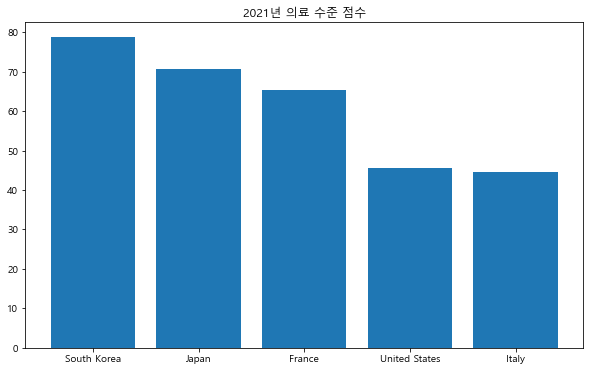

In [175]:
plt.figure(figsize=(10, 6))
plt.bar(temp['Country'], temp['HealthCareIndexOverall'])
plt.title('2021년 의료 수준 점수')
plt.show()

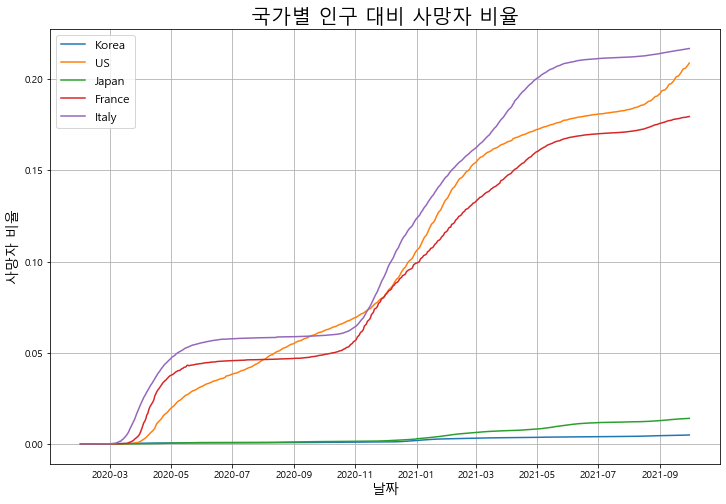

In [177]:
plt.figure(figsize=(12, 8))
plt.plot(Korea['날짜'], Korea['사망자 비율 (%)'], label="Korea")
plt.plot(US['날짜'], US['사망자 비율 (%)'], label='US')
plt.plot(Japan['날짜'], Japan['사망자 비율 (%)'], label='Japan')
plt.plot(France['날짜'], France['사망자 비율 (%)'], label='France')
plt.plot(Italy['날짜'], Italy['사망자 비율 (%)'], label='Italy')
plt.title('국가별 인구 대비 사망자 비율', fontsize=20)
plt.grid(True)
plt.ylabel('사망자 비율', fontsize=14)
plt.xlabel('날짜', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

- 2021년 의료수준 점수를 보면 한국, 일본, 프랑스, 미국, 이탈리아 순으로 나타남
- 국가별 인구 대비 사망자 비율은 의료수준 점수와 반대로 이탈리아가 가장 높고, 미국, 프랑스, 일본, 한국으로 나타남

# 결론
- 국가별 코로나 관련 정책을 세세하게 살펴본 것이 아닌 데이터를 통해서만 분석한 결과
- 의료수준이 높아 타 국가에 비해 코로나 사망자 비율은 매우 낮게 나타나고 있으나, \
우리나라가 다른 국가들에 비해 코로나 대응이 잘 되고 있다고 말하기 어려움.
- 접종 완료율이 예상대로 높아지면 이번 거리두기가 끝나는 대로 '단계적 일상회복'으로  전환하는 위드코로나를 시행할 대한민국
- 2021년 11월을 기점으로 대한민국이 위드코로나를 시행한다고 봤을 때, 확진자가 더 많이 발생하는 상황에 대비한 정책 마련이 시급해보임